<a href="https://colab.research.google.com/github/JohnYCLam/MachineLearning/blob/main/PyTorch_Custom_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

In [3]:
#set up device (cpu/ gpu) for computation
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
print(device)

cpu


In [4]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if not image_path.is_dir():
    image_path.mkdir(parents = True, exist_ok = True)

    f = open(data_path/ "pizza_steak_sushi.zip", "wb")
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    f.write(request.content)

    zip_ref = zipfile.ZipFile(data_path/ "pizza_steak_sushi.zip", "r")
    zip_ref.extractall(image_path)

In [13]:
#Have a look on the data directory
import os

def directory_tree(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"{dirpath:40s} | {len(dirnames)} folders | {len(filenames)} files")
        print(f"{'-'*70}")

directory_tree(image_path)

data/pizza_steak_sushi                   | 2 folders | 0 files
----------------------------------------------------------------------
data/pizza_steak_sushi/test              | 3 folders | 0 files
----------------------------------------------------------------------
data/pizza_steak_sushi/test/pizza        | 0 folders | 25 files
----------------------------------------------------------------------
data/pizza_steak_sushi/test/steak        | 0 folders | 19 files
----------------------------------------------------------------------
data/pizza_steak_sushi/test/sushi        | 0 folders | 31 files
----------------------------------------------------------------------
data/pizza_steak_sushi/train             | 3 folders | 0 files
----------------------------------------------------------------------
data/pizza_steak_sushi/train/pizza       | 0 folders | 78 files
----------------------------------------------------------------------
data/pizza_steak_sushi/train/steak       | 0 folders | 75 

Path: data/pizza_steak_sushi/train/pizza/1649276.jpg
Label: pizza
Dimension: 384 x 512


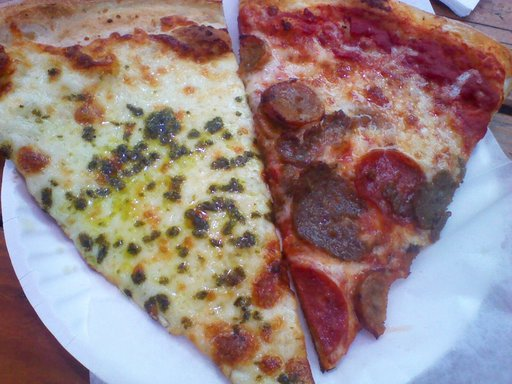

In [18]:
#visualize an image
import random
from PIL import Image

image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Path: {random_image_path}")
print(f"Label: {image_class}")
print(f"Dimension: {img.height} x {img.width}")
img

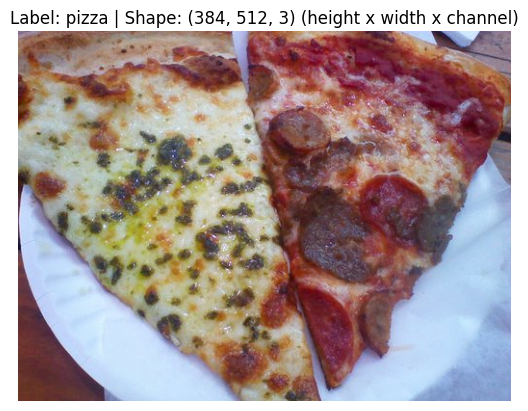

In [20]:
#Alternatively, we can visualize the image with matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt

#need to transform image to np array for visualization
img_array = np.asarray(img)

plt.imshow(img_array)
plt.title(f"Label: {image_class} | Shape: {img_array.shape} (height x width x channel)")
plt.axis(False);